<a href="https://colab.research.google.com/github/addy1997/Task9-personality-prediction/blob/main/personality_trait_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# import necessary packages 

import numpy as np
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold, GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [41]:
# load training and testing data and merge dataset 
url1 = 'https://raw.githubusercontent.com/addy1997/Task9-personality-prediction/main/train.csv'
url2 = 'https://raw.githubusercontent.com/addy1997/Task9-personality-prediction/main/test.csv'
df_train = pd.read_csv(url1)
train_length = len(df_train)
df_test = pd.read_csv(url2)
df_train.rename(columns = {'Personality (Class label)':'Personality'}, inplace = True) 
df_test.rename(columns = {'Personality (class label)':'Personality'}, inplace = True) 
df = pd.concat([df_train, df_test])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


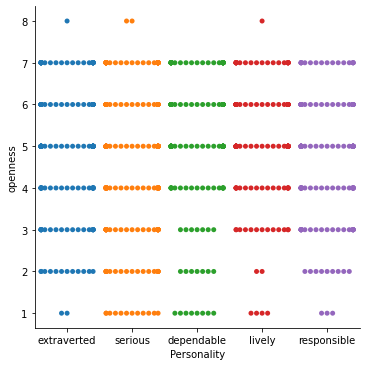

In [42]:
# distributions for a trait in a personality
sb.catplot(x="Personality", y="openness", kind="swarm", data=df)

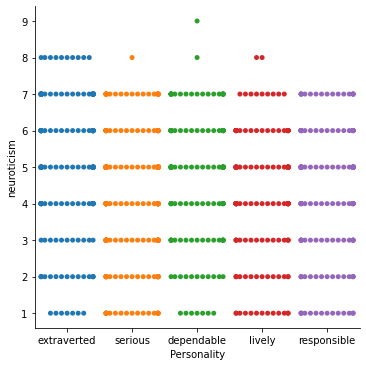

In [43]:
# distributions for a trait in a personality
sb.catplot(x="Personality", y="neuroticism", kind="swarm", data=df)

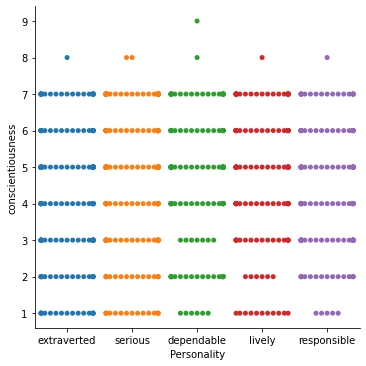

In [44]:
# distributions for a trait in a personality
sb.catplot(x="Personality", y="conscientiousness", kind="swarm", data=df)

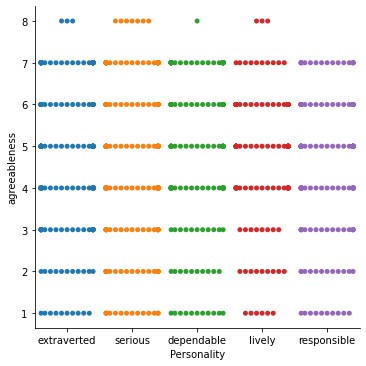

In [45]:
# distributions for a trait in a personality
sb.catplot(x="Personality", y="agreeableness", kind="swarm", data=df)


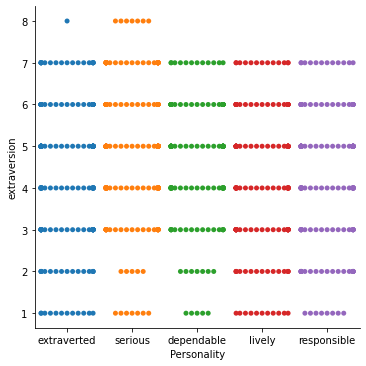

In [46]:
# distributions for a trait in a personality
sb.catplot(x="Personality", y="extraversion", kind="swarm", data=df)

In [47]:
# rescaling  and mapping data
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})

df['Personality'] = df['Personality'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})

In [48]:
# isolating the column with 'NaN'' values

df[df.isnull().sum(axis=1) > 0]


,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
449,NaN,21,2,5,6,1,5,4


In [49]:
# basic data opearations
df.groupby(by=['Personality', 'Age']).mean().loc[4]

,Gender,openness,neuroticism,conscientiousness,agreeableness,extraversion
Age,,,,,,
17,0.375000,4.916667,4.208333,5.041667,4.291667,5.375000
18,0.531250,5.000000,4.656250,5.109375,4.968750,4.843750
19,0.506024,4.710843,4.253012,4.433735,5.228916,5.156627
20,0.250000,4.975000,4.225000,5.200000,4.925000,4.825000
21,0.406250,4.575758,4.424242,5.030303,5.030303,5.030303
22,0.476190,5.142857,4.190476,4.619048,5.095238,4.476190
23,0.133333,4.466667,4.133333,4.933333,5.000000,5.000000
24,0.400000,4.866667,4.466667,5.133333,3.933333,5.666667
25,0.500000,5.125000,3.875000,5.375000,4.625000,5.250000


In [50]:

df.at[449, 'Gender'] = 0

In [51]:

df.skew()

Gender              -0.093991
Age                  0.471614
openness            -0.638642
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness       -0.552094
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [52]:
df['openness'] = np.sqrt(max(df['openness']+1) - df['openness'])
df['agreeableness'] = np.sqrt(max(df['agreeableness']+1) - df['agreeableness'])
df.skew()


Gender              -0.093991
Age                  0.471614
openness             0.234889
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness        0.107320
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [53]:
# display data
df_train = df[:train_length]
df_test = df[train_length:]
Y, X = df_train.values[:,-1], df_train.values[:,:-1]
Y_test, X_test = df_test.values[:,-1], df_test.values[:,:-1]
X = RobustScaler().fit_transform(X)
X_test = RobustScaler().fit_transform(X_test)


In [54]:
df_train['Personality'].value_counts() / len(df_train)


4    0.227080
1    0.211566
0    0.194640
2    0.188999
3    0.177715
Name: Personality, dtype: float64

In [55]:
df_test['Personality'].value_counts() / len(df_test)

4    0.485714
1    0.244444
3    0.126984
2    0.076190
0    0.066667
Name: Personality, dtype: float64

In [56]:
# using SVC, KNN, and adaboost classifier

param_grids = {}
models = []

logistic = LogisticRegression()
models.append(logistic)
param_grids[logistic] = {'C':np.arange(0.01, 1, 0.01)}

#classifier 1
svc = SVC()
models.append(svc)
param_grids[svc] = {'kernel':['poly','rbf'],
                    'C':np.arange(0.01, 1, 0.01)}
#classifier 2
adaboost = AdaBoostClassifier()
models.append(adaboost)
param_grids[adaboost] = {'n_estimators':np.arange(10, 101, 10)}

#classifier 3
knn = KNeighborsClassifier()
models.append(knn)
param_grids[knn] = {'n_neighbors':np.arange(2,11,1),
                    'weights':['uniform', 'distance'],
                    'p':np.arange(1,4,1)}

In [57]:
# model building 
def choose_hyperparameters(models, param_grids, X_train, Y_train):
    cv_models = {}
    scores = {}
    cv_with_scores = {}
    for model in models:
        label = str(type(model)).split('.')[-1].split("'")[0]
        gs = GridSearchCV(model, param_grid=param_grids[model])
        gs.fit(X_train, Y_train)
        cv_models[label] = gs
        scores[label] = gs.best_score_
        cv_with_scores[gs] = gs.best_score_
    return cv_models, scores, cv_with_scores

cv_models, scores, cv_with_scores = choose_hyperparameters(models, param_grids, X, Y)

In [58]:
# calculating scores for model testing
def relabel_personality(x):
    if x == 0 or x == 3:
        return 1
    else:
        return 0

relabel_personality_v = np.vectorize(relabel_personality)

Y = relabel_personality_v(Y)
Y_test = relabel_personality_v(Y_test)

cv_models, scores, cv_with_scores = choose_hyperparameters(models, param_grids, X, Y)
scores

{'AdaBoostClassifier': 0.6248326840475477,
 'KNeighborsClassifier': 0.6192088702427331,
 'LogisticRegression': 0.6276495854559985,
 'SVC': 0.6304764758765359}

In [59]:
# training model
def get_oof_predictions(model, X_train, Y_train, kf):
    m = len(X_train)
    oof_predictions = np.empty((m,))
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X[train_index], X[val_index] 
        Y_tr = Y[train_index]
        model.fit(X_tr, Y_tr)
        oof_predictions[val_index] = model.predict(X_val)
    return oof_predictions
        
def train_metamodel(metamodels, param_grids, models, X_train, Y_train, k):
    m = len(X_train)
    kf = KFold(n_splits=k)
    models_predictions = np.zeros(m)
    for model in models:
        oof_predictions = get_oof_predictions(model, X_train, Y_train, kf)
        models_predictions = np.column_stack((models_predictions, oof_predictions))
    models_predictions = models_predictions[:, 1:]
    cv_models, scores, cv_with_scores = choose_hyperparameters(metamodels, 
                                                               param_grids, 
                                                               models_predictions, 
                                                               Y_train)
    metamodel = max(cv_with_scores, key=cv_with_scores.get)
    return metamodel

def predict_with_models(models, X):
    m = len(X)
    models_predictions = np.zeros(m)
    for model in models:
        model_predictions = model.predict(X)
        models_predictions = np.column_stack((models_predictions, model_predictions))
    return models_predictions[:, 1:]

In [60]:
# testing model's accuracy 
metamodels = models.copy()
models = list(cv_models.values())
metamodel = train_metamodel(metamodels, param_grids, models, X, Y, 5)
Y_pred = predict_with_models(models, X_test)
metamodel_test_acc = metamodel.score(Y_pred, Y_test)
print("the model accuracy is-",metamodel_test_acc)


the model accuracy is- 0.8063492063492064
